In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector


In [3]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
# 在零状态下使用 2 个量子位进行初始化；2 个经典位设置为零；circuit是量子电路
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0 H门
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1  受控非门
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
# 如果将整个量子和经典寄存器传递给measure，第 i 个量子位的测量结果将存储在第 i 个经典位中
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()
# plot_histogram(counts)


Total count for 00 and 11 are: {'11': 480, '00': 520}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [4]:
circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

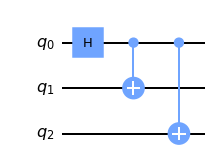

In [5]:
circ.draw('mpl')

In [6]:
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [7]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

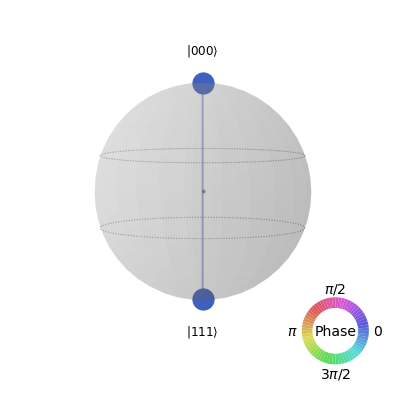

In [8]:
state.draw('qsphere')


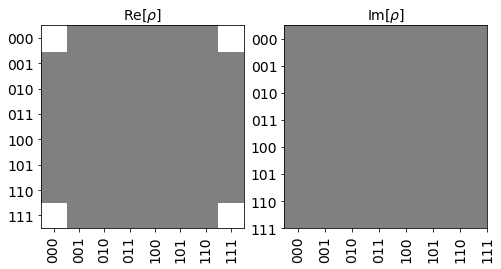

In [9]:
state.draw('hinton')
